# Weather Underground API

Önceki yazılarımızda [Star Wars](http://www.veridefteri.com/2017/12/13/veri-defteri-ben-seviyor-cok/) ve [FourSquare](http://www.veridefteri.com/2018/01/23/foursquare-api/) için uygulama ara yüzlerini (API, Application Programming Interface) kullanmayı görmüştük. API'ları kullanarak çeşitli kaynaktan verilere erişmek, bu verilerle uygulama geliştirmek mümkün. Özellikle hava durumu, sosyal medya ya da demografik veriler gibi kaynaklar, modellerinizde sadece iç kaynaklı verilerle açıklayamayacağınız değişiklikleri anlamanızı sağlayabileceği için yararlı. 

Bu yazıda da hava durumu ile ilgili hizmetler sunan [Weather Underground](https://www.wunderground.com/) sitesinin API'ını kullanmayı öğreneceğiz. Hava durumunun satışlar ve ruh hali üzerine etkilerini araştıran bir çok makale var. Weather Underground, güncel hava durumunun yanında 3 ve 10 günlük tahminler ve (kısıtlı da olsa) geçmiş hava durumu verisine de sahip. 

[Weather Underground](https://www.wunderground.com/weather/api/) API'ını kullanmak için web sayfasından bir kullanıcı oluşturmak yeterli. Ancak ücretsiz olan `Developer` tipi hesap için günlük limit 500 sorgu, dakikalık limit ise 10 sorgu. Sorgu limitini arttırmak için ödeme yaparak farklı statüdeki kullanıcı hesapları alabilirsiniz.

API bir çok programlama diliyle kullanılabiliyor. [API dokümantasyonu](https://www.wunderground.com/weather/api/d/docs) çok açıklayıcı değil ancak `Twitter` ve `Foursquare` gibi API'ların aksine güçlü bir destek hizmetleri var ve sorularınız için kullanıcı forumlarını kullanabilirsiniz.

Planlar ve kullanıcı limitlerini aşağıda görebilirsiniz. 

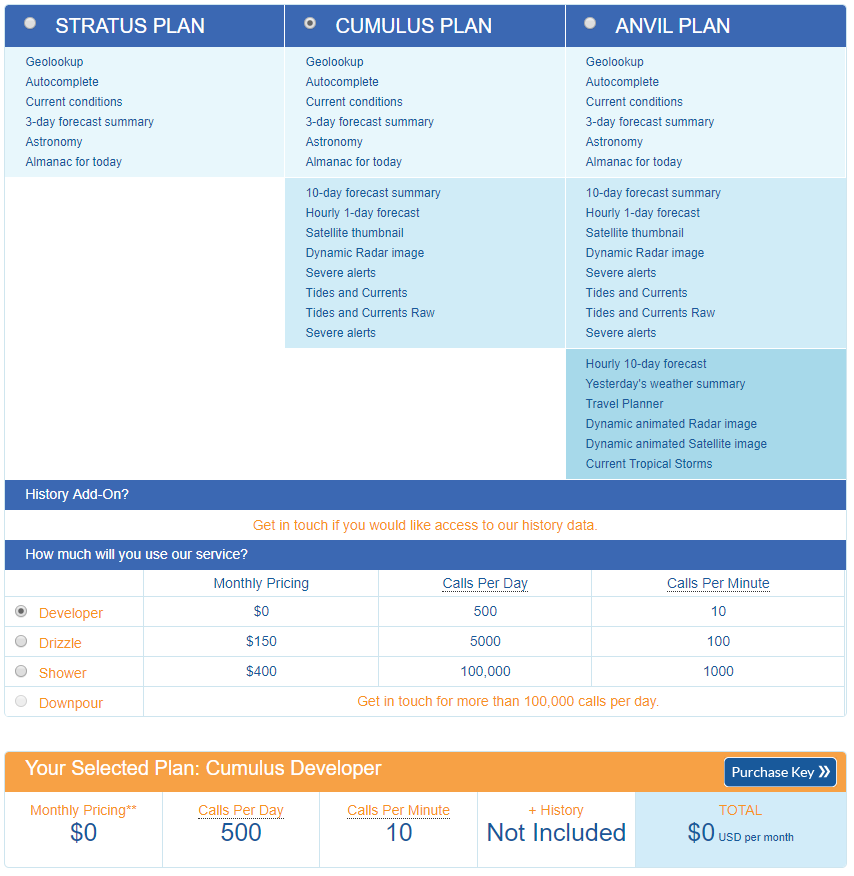

In [1]:
from IPython.display import Image
Image('WU_API.png')

Kullanıcınızı oluşturduktan sonra Weather Underground size bir kullanıcı anahtarı (key) sağlıyor. Bu anahtarı sorgu adreslerine eklemeniz gerekecek. 

İlk olarak, gerekli kütüphaneleri yükleyelim. Bu kütüphaneler API sorgusunun cevabını almak ve veriyi JSON formatına çevirmek için gerekli.

In [2]:
import urllib.request as request
import json

# Hava Durumu
Kullanıcı oluşturduktan sonra API anahtarını ve lokasyonu kullanarak ilk sorgumuzu yapalım. Veri formatı JSON, verideki anahtarları öğrenmek için dokümantasyonu kullanabilirsiniz.

İlk sorguyu içeren aşağıdaki adreste

* 'xxxx' benim gizlediğim anahtarımı,
* `conditions` yaptığımız sorgu tipini (farklı sorgu tipleri de göreceğiz),
* `Turkey/İstanbul` da sorgulamak istediğimiz yeri belirtiyor. 

Kısaca sorgu, İstanbul'un güncel hava durumunu sorguluyor. Sorgunun sonuna `json` şeklinde uzantı da eklememiz gerekiyor.

In [3]:
# xxxx yerine kendi anahtarınızı girmeniz gerekiyor.
f = request.urlopen('http://api.wunderground.com/api/xxxx/conditions/q/Turkey/Istanbul.json')

# Aldığımız yanıtı JSON formatına çevirip, formatlıyoruz.
json_string = f.read()
parsed_json = json.loads(json_string)
print(json.dumps(parsed_json, indent = 4))
f.close()


{
    "response": {
        "version": "0.1",
        "termsofService": "http://www.wunderground.com/weather/api/d/terms.html",
        "features": {
            "conditions": 1
        }
    },
    "current_observation": {
        "image": {
            "url": "http://icons.wxug.com/graphics/wu2/logo_130x80.png",
            "title": "Weather Underground",
            "link": "http://www.wunderground.com"
        },
        "display_location": {
            "full": "Istanbul, Turkey",
            "city": "Istanbul",
            "state": "34",
            "state_name": "Turkey",
            "country": "TU",
            "country_iso3166": "TR",
            "zip": "00000",
            "magic": "124",
            "wmo": "17060",
            "latitude": "41.00999832",
            "longitude": "28.95000076",
            "elevation": "28.0"
        },
        "observation_location": {
            "full": "Cihann\u00fcma, Be\u015fikta\u015f, ",
            "city": "Cihann\u00fcma, Be\u015fikt

Döndürülen veride aşağıdaki kalemler var:

* `response`: Döndürülen cevabın durumunu burada bulabilirsiniz. Alacağınız hataları buradan kontrol edebilirsiniz. 
* `current_observation` şu anki hava durumu altında aşağıdaki bilgiler var:
  * `display_location` ve `observation_location` hava durumu sorgusunun yapıldığı ve ölçümün alındığı yerin bilgilerini içeriyor. 
  * Sıcaklık, nem, rüzgar, basınç, buğulanma sıcaklığı, görüş, radyasyon, UV, yağış gibi hava durumu bilgileri de veriliyor. 

# Tahmin / 10 Günlük Tahmin

Hava durumu tahminlerine `forecast` sorgusuyla erişebiliriz. `forecast` yarım günlük tahminler şeklinde önümüzdeki üç günü tahmin ediyor. Daha uzun süreli tahmin için ise `forecast10day` sorgusunu kullanabilirsiniz. Hava durumu tahmini aynı zamanda `simpleforecast` anahtarının altında da bulunmakta. Buradaki veriler tablo formatına daha yakın.

In [4]:
f = request.urlopen('http://api.wunderground.com/api/xxxx/forecast/q/Turkey/Istanbul.json')

json_string = f.read()
parsed_json = json.loads(json_string)
print('Metin halindeki hava durumu tahmini')
print(json.dumps(parsed_json['forecast']['txt_forecast']['forecastday'][3], indent = 4))

Metin halindeki hava durumu tahmini
{
    "period": 3,
    "icon": "nt_chancerain",
    "icon_url": "http://icons.wxug.com/i/c/k/nt_chancerain.gif",
    "title": "Wednesday Night",
    "fcttext": "Partly cloudy skies early followed by increasing clouds with showers developing later at night. Low 47F. SW winds shifting to N at 10 to 15 mph. Chance of rain 40%.",
    "fcttext_metric": "Partly cloudy skies early followed by increasing clouds with showers developing later at night. Low 8C. SW winds shifting to N at 15 to 25 km/h. Chance of rain 40%.",
    "pop": "40"
}


Şimdi bir de `simpleforecast` altındaki tahmine bakalım. Göreceğiniz gibi tahmin sıcaklık, yağış, rüzgar gibi konularda çeşitli veriler içeriyor.

In [5]:
print('Rakamlarla hava durumu tahmini')
print(json.dumps(parsed_json['forecast']['simpleforecast']['forecastday'][0], indent = 4))

f.close()

Rakamlarla hava durumu tahmini
{
    "date": {
        "epoch": "1521561600",
        "pretty": "7:00 PM +03 on March 20, 2018",
        "day": 20,
        "month": 3,
        "year": 2018,
        "yday": 78,
        "hour": 19,
        "min": "00",
        "sec": 0,
        "isdst": "0",
        "monthname": "March",
        "monthname_short": "Mar",
        "weekday_short": "Tue",
        "weekday": "Tuesday",
        "ampm": "PM",
        "tz_short": "+03",
        "tz_long": "Europe/Istanbul"
    },
    "period": 1,
    "high": {
        "fahrenheit": "59",
        "celsius": "15"
    },
    "low": {
        "fahrenheit": "50",
        "celsius": "10"
    },
    "conditions": "Chance of Rain",
    "icon": "chancerain",
    "icon_url": "http://icons.wxug.com/i/c/k/chancerain.gif",
    "skyicon": "",
    "pop": 30,
    "qpf_allday": {
        "in": 0.0,
        "mm": 0
    },
    "qpf_day": {
        "in": 0.0,
        "mm": 0
    },
    "qpf_night": {
        "in": 0.0,
        "mm

# Geçmiş Hava Durumu Verisi

Geçmiş dataya `history` sorgusu ile erişmek mümkün. Örnek olarak Ataşehir'e yakın bir istasyonun verisini çekebiliriz. Bunun için iki parametreye ihtiyacımız var:

* Ölçümün yapıldığı yer bilgisi olarak kullanacağımız pws'nin (private weather station, kişisel ölçüm istasyonu) kodu (pws:IISTANBU81), 
* Tarih bilgisi. Tarih bilgisini url'ye eklememiz gerekecek. 31 Aralık 2017 tarihindeki hava durumuna erişmek için sorgumuzda `history_20171231` değerini kullanacağız.

Aşağıdaki sorgu o gün içindeki gözlemleri döndürüyor. Saat saat hava durumunu elde etsek de, yağış gibi veriler geçmiş veri kümelerinde bulunmuyor. Veri kümesi saat saat yapılan bütün gözlemleri içerdiğinden sadece ilk gözleme bakalım. 

In [6]:
f = request.urlopen('http://api.wunderground.com/api/xxxx/history_20171231/q/pws:IISTANBU81.json')

json_string = f.read()
parsed_json = json.loads(json_string)
print(json.dumps(parsed_json['history']['observations'][0], indent = 4))
f.close()


{
    "date": {
        "pretty": "12:07 AM +03 on December 31, 2017",
        "year": "2017",
        "mon": "12",
        "mday": "31",
        "hour": "00",
        "min": "07",
        "tzname": "Europe/Istanbul"
    },
    "utcdate": {
        "pretty": "9:07 PM GMT on December 30, 2017",
        "year": "2017",
        "mon": "12",
        "mday": "30",
        "hour": "21",
        "min": "07",
        "tzname": "UTC"
    },
    "tempm": "9.3",
    "tempi": "48.7",
    "dewptm": "5.5",
    "dewpti": "41.9",
    "hum": "77",
    "wspdm": "-1608.8",
    "wspdi": "-999.9",
    "wgustm": "-1607.4",
    "wgusti": "-999.0",
    "wdird": "-9999",
    "wdire": "North",
    "pressurem": "1025.6",
    "pressurei": "30.29",
    "windchillm": "-999",
    "windchilli": "-999",
    "heatindexm": "-9999",
    "heatindexi": "-9999",
    "precip_ratem": "-2539.7",
    "precip_ratei": "-99.99",
    "precip_totalm": "-2539.7",
    "precip_totali": "-99.99",
    "solarradiation": "",
    "UV": "",


Gözlem yerel saatle 00:07'de yapılmış. Yağış ve rüzgarla ilgili kimi kalemler veri de yer alsa da (`precip_ratem` gibi) gözlem değerleri anlamlı durmuyor. 

Belki ücretli planlarla detaylı geçmiş veriye ulaşmak mümkündür. 

# Diğer Sorgular

Weather Underground API'ını kullanarak `hourly` ve `hourly10day` sorgularıyla saatlik tahminlere, `geolookup` ile istediğiniz yere yakın istasyonlara, `currenthurricane` sorgusuyla fırtına bilgilerine, `tide` sorgusuyla gelgit bilgilerine ve `webcams` sorgusuyla istasyonların kamera görüntülerine ulaşmanız mümkün. 

Saatlik hava durumu tahminiyle (`hourly`) bir sonraki saate bakalım.

In [7]:
f = request.urlopen('http://api.wunderground.com/api/xxxx/hourly/q/pws:IISTANBU81.json')

json_string = f.read()
parsed_json = json.loads(json_string)
print('Tahmin zamanı')
print(json.dumps(parsed_json['hourly_forecast'][0]['FCTTIME']['pretty'], indent = 4))

zaman = parsed_json['hourly_forecast'][0]['FCTTIME']['pretty']
print('{} için sıcaklık'.format(zaman))
print(json.dumps(parsed_json['hourly_forecast'][0]['temp'], indent = 4))
print('{} için rüzgar hızı'.format(zaman))
print(json.dumps(parsed_json['hourly_forecast'][0]['wspd'], indent = 4))
print('{} için rüzgar yönü'.format(zaman))
print(json.dumps(parsed_json['hourly_forecast'][0]['wdir'], indent = 4))
f.close()


Tahmin zamanı
"9:00 AM +03 on March 20, 2018"
9:00 AM +03 on March 20, 2018 için sıcaklık
{
    "english": "56",
    "metric": "13"
}
9:00 AM +03 on March 20, 2018 için rüzgar hızı
{
    "english": "18",
    "metric": "29"
}
9:00 AM +03 on March 20, 2018 için rüzgar yönü
{
    "dir": "SW",
    "degrees": "229"
}


Kadıköy'e yakın kişisel hava durumu istasyonlarını (personal weather station, pws) görelim. Kadıköy'ün koordinatı olarak 40.992756, 29.024704 değerlerini alabiliriz.

In [8]:
f = request.urlopen('http://api.wunderground.com/api/xxxx/geolookup/q/40.992756,29.024704.json')

json_string = f.read()
parsed_json = json.loads(json_string)
print(json.dumps(parsed_json['location']['nearby_weather_stations']['pws'], indent = 4))
f.close()

{
    "station": [
        {
            "neighborhood": "\u00d6zel Saint-Joseph Frans\u0131z Lisesi",
            "city": "Kad\u0131k\u00f6y",
            "state": "",
            "country": "TR",
            "id": "IKADKY6",
            "lat": 40.982716,
            "lon": 29.028534,
            "distance_km": 1,
            "distance_mi": 0
        },
        {
            "neighborhood": "Yigit - Kalamis Residence Weather Station",
            "city": "Kad\u0131k\u00f6y",
            "state": "",
            "country": "TR",
            "id": "IKADKY4",
            "lat": 40.985214,
            "lon": 29.036858,
            "distance_km": 1,
            "distance_mi": 0
        },
        {
            "neighborhood": "Suadiye",
            "city": "\u0130stanbul",
            "state": "\u0130STANBUL",
            "country": "TR",
            "id": "ISTANBUL189",
            "lat": 40.962555,
            "lon": 29.076281,
            "distance_km": 5,
            "distance_mi": 3
 

1 ile 6 km mesafede dört istasyon olduğunu görüyoruz. İstasyonların id değerlerini başka sorgular için kullanmanız mümkün.

Bu yazının Jupyter Notebook dosyasına [GitHub dizinimiz](https://github.com/sibirbil/VeriDefteri) üzerinden ulaşabilirsiniz.